# MDI220
# Statistiques

# Mini-project 

Ce mini-projet est pour le cours Statistiques MDI220.

Vous devez remplir ce notebook et le uploader sur eCampus, **avec les figures**. S'il vous plaît, assurez-vous que le notebook s'execute **sans erreurs**.

Vous pouvez accomplir ce projet en français ou en anglais (votre préférence).

Vous pouvez travailler en equipe, mais le notebook final, compris le texte et le code, doit être **votre propre**. Plagiat entre les étudiants est strictement interdit.

S'il vous plaît, donner **la réponse concise** et **le code concis**, avec des commentaires ou approprié.

(Re)nommer le fichier de ce notebook dans le format suivant : "NOM_Prenom_projet_MDI220.ipynb".

## Votre nom: Adnane El Bouhali

## Imports

S'il vous plaît, **n'importez pas** d'autres librairies.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from scipy.stats import norm, chi2, gaussian_kde

In [3]:
import seaborn as sns

## Données

Nous considérons les données de **consomation quotidienne d'electricité** (en MW) en France dans le période 2013-2023. Les données sont accessibles sur **eCampus**.

Les informationnes détaillées sur les données sont accessible [ici](https://www.data.gouv.fr/fr/datasets/consommation-quotidienne-brute-regionale/).

In [4]:
# do not modify this cell
filename = 'power_consumption.csv'
df = pd.read_csv(filename)

In [5]:
df.head()
df['date'] = pd.to_datetime(df['date'])

In [6]:
regions = list(df.region.unique())

In [7]:
regions

['Auvergne-Rhône-Alpes',
 'Bourgogne-Franche-Comté',
 'Bretagne',
 'Centre-Val de Loire',
 'Grand Est',
 'Hauts-de-France',
 'Normandie',
 'Nouvelle-Aquitaine',
 'Occitanie',
 'Pays de la Loire',
 "Provence-Alpes-Côte d'Azur",
 'Île-de-France']

In [8]:
# average consumption per region
df[["region", "consumption"]].groupby("region").mean().astype(int)

,consumption
region,
Auvergne-Rhône-Alpes,7495
Bourgogne-Franche-Comté,2416
Bretagne,2546
Centre-Val de Loire,2139
Grand Est,5155
Hauts-de-France,5726
Normandie,3168
Nouvelle-Aquitaine,4925
Occitanie,4266


In [9]:
# average consumption in France (MW)
df[["region", "consumption"]].groupby("region").mean().sum().astype(int)

consumption    53582
dtype: int32

In [10]:
# selection of a region
region = "Bretagne"
df_region = df[df.region == region].copy()

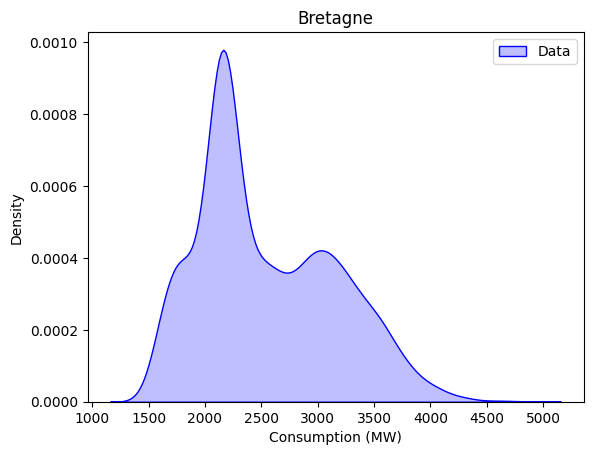

In [11]:
# density (with kde = kernel density estimation)
sns.kdeplot(data=df_region, x="consumption", label="Data", color='blue', fill=True)
plt.title(region)
plt.xlabel("Consumption (MW)")
plt.legend() 
plt.show()

## A. Estimation ponctuelle

Dans l'entité du projet, consomation quotidienne d'electricité est supposée i.i.d., avec la distribution gaussienne.

Nous allons utiliser les estimateurs suivants pour la moyenne et la variance, pour $n$ observations $x_1,\ldots,x_n$ :
$$
\hat \mu = \frac 1 n \sum_{i=1}^n x_i\quad \hat{\sigma^2} = \frac 1 {n-1}\sum_{i=1}^n (x_i - \hat \mu)^2
$$
L'estimateur correspondant de l'écart-type est :
$$
\hat \sigma = \sqrt{\hat{\sigma^2}}
$$

Considérons la region Bretagne. 

1. Montrez que les estimateur pour la moyenne et la variance sont sans biais.

Pour montrer que les estimateurs pour la moyenne et la variance sont sans biais, nous devons calculer l'espérance (espérance mathématique) de ces estimateurs et démontrer qu'ils sont égaux aux véritables moyenne et variance de la distribution sous-jacente.

Commençons par l'estimateur de la moyenne, $\hat{\mu}$ :
$$
\hat{\mu} = \frac{1}{n} \sum_{i=1}^{n} x_i
$$

L'espérance de cet estimateur est donnée par :
$$
E(\hat{\mu}) = E\left(\frac{1}{n} \sum_{i=1}^{n} x_i\right)
$$

En utilisant les propriétés de l'espérance (linéarité de l'espérance), nous pouvons déplacer la constante $\frac{1}{n}$ en dehors de l'espérance :
$$
E(\hat{\mu}) = \frac{1}{n} \sum_{i=1}^{n} E(x_i)
$$

Puisque les $x_i$ sont supposées être des observations i.i.d. avec une distribution gaussienne, chaque $x_i$ suit la même distribution, et par conséquent, elles ont la même espérance. Nous pouvons donc écrire :
$$
E(\hat{\mu}) = \frac{1}{n} \sum_{i=1}^{n} \mu = \frac{1}{n} (n \mu) = \mu
$$

Où $\mu$ est la véritable moyenne de la distribution. Cela montre que l'estimateur de la moyenne $\hat{\mu}$ est sans biais, car son espérance est égale à la véritable moyenne $\mu$.

Passons maintenant à l'estimateur de la variance, $\hat{\sigma}^2$ :
$$
\hat{\sigma}^2 = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \hat{\mu})^2
$$
L'espérance de cet estimateur est donnée par :
$$
E(\hat{\sigma}^2) = E\left(\frac{1}{n-1} \sum_{i=1}^{n} (x_i - \hat{\mu})^2\right)
$$

De manière similaire à ce que nous avons fait pour $\hat{\mu}$, nous pouvons déplacer la constante $\frac{1}{n-1}$ en dehors de l'espérance :
$$
E(\hat{\sigma}^2) = \frac{1}{n-1} \sum_{i=1}^{n} E((x_i - \hat{\mu})^2)
$$

Puisque les $x_i$ sont supposées être i.i.d., nous pouvons supprimer la somme :
$$
E(\hat{\sigma}^2) = \frac{n}{n-1} E((x_1 - \hat{\mu})^2)
$$

Maintenant, nous devons calculer l'espérance de $(x_1 - \hat{\mu})^2$. Cela peut être exprimé en termes de la variance de $x_1$ et de l'espérance de $\hat{\mu}$ :
$$
E((x_1 - \hat{\mu})^2) = E(x_1^2) - 2E(x_1 \hat{\mu}) + E(\hat{\mu}^2) 
$$

Pour le calcul de $E(x_1^2)$ , nous procédons comme suit :
$$
E(x_1^2) = Var(x_1) + E(x_1)^2 = {\sigma}^2 + {\mu}^2
$$

Ensuite, pour le calcul de $E(\hat{\mu}^2)$ , de manière similaire :
$$
E(\hat{\mu}^2) = Var(\hat{\mu}) + E(\hat{\mu})^2
$$

Calculons $Var(\hat{\mu})$ :
$$
Var(\hat{\mu}) = Var(\frac{1}{n} \sum_{i=1}^{n} x_i) = \frac{1}{n^2} n Var(x_1) = \frac{{\sigma}^2}{n}
$$

Et on sait que $E(\hat{\mu}) = \mu$, donc :
$$
E(\hat{\mu}^2) = \frac{{\sigma}^2}{n} + \mu^2
$$

Il ne reste plus qu'à calculer $E(x_1 \hat{\mu})$ :
$$
E(x_1 \hat{\mu}) = E(x_1 \frac{1}{n} \sum_{i=1}^{n} x_i ) = \frac{1}{n} E(x_1^2 + x_1 x_2 + ... + x_1 x_n) = \frac{1}{n} [E(x_1^2) + E(x_1 x_2) + ... + E(x_1 x_n)]
$$

Puisque les $x_i$ sont supposées être i.i.d. :
$$
E(x_1 \hat{\mu}) = \frac{1}{n} [E(x_1^2) + \sum_{i=2}^{n} E(x_1)E(x_i)] = \frac{1}{n} [E(x_1^2) + (n-1) E(x_1)^2] = \frac{1}{n} [\sigma^2 + \mu^2 + (n-1)\mu^2] = \frac{{\sigma}^2}{n} + \mu^2
$$

Ensuite, on remplace le tout dans l'expression de $E((x_1 - \hat{\mu})^2)$ :
$$
E((x_1 - \hat{\mu})^2) = \sigma^2 + \mu^2 - 2(\frac{{\sigma}^2}{n} + \mu^2) + \frac{{\sigma}^2}{n} + \mu^2 = \frac{n-1}{n} \sigma^2
$$

Finalement, on calcule $E(\hat{\sigma}^2)$ :
$$
E(\hat{\sigma}^2) = \frac{n}{n-1} \frac{n-1}{n} \sigma^2 = \sigma^2
$$

Cela montre que l'estimateur de la variance $\hat{\sigma}^2$ est sans biais, car son espérance est égale à la véritable variance $\sigma^2$.

2. Donnez les valeurs obtenues pour la moyenne et pour la variance en utilisant ces estimateurs.

In [12]:
# Calcul de la moyenne de la consommation d'électricité en Bretagne
moyenne = df_region["consumption"].mean()

# Calcul de la variance de la consommation d'électricité en Bretagne
variance = df_region["consumption"].var()

# Affichage de la moyenne et la variance
print("Moyenne :", moyenne)
print("Variance :", variance)

Moyenne : 2546.536155666579
Variance : 365956.0141448174


3. Générez les nouvelles données en utilisant le modèle gaussien avec ces estimateurs, et avec le même nombre d'observations.

In [13]:
# Génération de nouvelles données en utilisant une distribution normale avec la moyenne et la variance des données existantes
nouvelles_donnees = norm.rvs(loc=moyenne, scale=np.sqrt(variance), size=len(df_region))

# Affichage des nouvelles données
print(nouvelles_donnees)

[3134.81146395 2095.96369896 2956.15764096 ... 1915.80981581 3058.0920745
 2599.81017225]


4. Tracez l'estimateur à noyau de la densité  *kde* (kernel density estimate) des données réelles et des données générées sur la même figure.

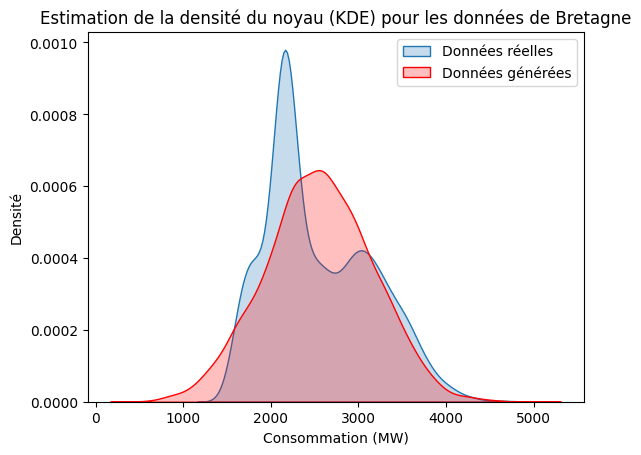

In [14]:
# Trace l'estimateur à noyau de densité (KDE) pour les données réelles en bleu avec un remplissage
sns.kdeplot(data=df_region, label="Données réelles", color='blue', fill=True)

# Trace l'estimateur à noyau de densité (KDE) pour les données générées en rouge avec un remplissage
sns.kdeplot(data=nouvelles_donnees, label="Données générées", color='red', fill=True)

# Ajoute une étiquette à l'axe des x et des y
plt.xlabel("Consommation (MW)")
plt.ylabel("Densité")

# Ajoute une légende basée sur les labels fournis lors du traçage
plt.legend()

# Définit le titre du graphique
plt.title("Estimation de la densité du noyau (KDE) pour les données de Bretagne")

# Affiche le graphique
plt.show()

5. Répétez la même procédure pour les jours d'hiver (du 22/12 au 21/03), après avoir mis à jour le modèle.

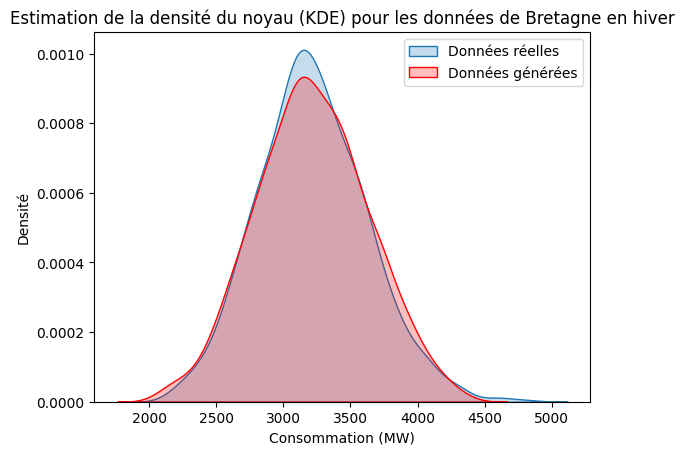

In [15]:
# Convertit la colonne 'date' en datetime pour s'assurer qu'elle est traitée correctement
df_region['date'] = pd.to_datetime(df_region['date'])

# Sélectionne les lignes du DataFrame où la date est dans la période hivernale (du 22/12 au 21/03)
df_region_hiver = df_region[
    ((df_region['date'].dt.month == 12) & (df_region['date'].dt.day >= 22)) |
    ((df_region['date'].dt.month == 1)) | ((df_region['date'].dt.month == 2)) |
    ((df_region['date'].dt.month == 3) & (df_region['date'].dt.day <= 21))
]

# Génération de nouvelles données en utilisant une distribution normale avec la moyenne et la variance des données existantes
nouvelles_donnees_hiver = norm.rvs(
    loc=df_region_hiver["consumption"].mean(), 
    scale=np.sqrt(df_region_hiver["consumption"].var()), 
    size=len(df_region_hiver)
)

# Trace l'estimateur à noyau de densité (KDE) pour les données réelles en bleu avec un remplissage
sns.kdeplot(data=df_region_hiver, label="Données réelles", color='blue', fill=True)

# Trace l'estimateur à noyau de densité (KDE) pour les données générées en rouge avec un remplissage
sns.kdeplot(data=nouvelles_donnees_hiver, label="Données générées", color='red', fill=True)

# Ajoute une étiquette à l'axe des x et des y
plt.xlabel("Consommation (MW)")
plt.ylabel("Densité")

# Ajoute une légende basée sur les labels fournis lors du traçage
plt.legend()

# Définit le titre du graphique
plt.title("Estimation de la densité du noyau (KDE) pour les données de Bretagne en hiver")

# Affiche le graphique
plt.show()

6. Dans quel des cas l'hypothèse gaussienne est plus appropriée ?

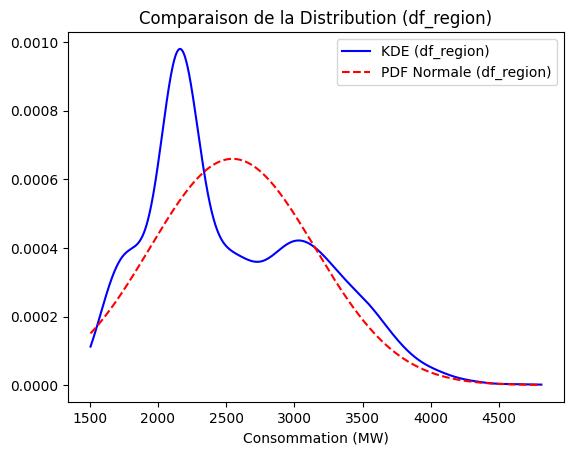

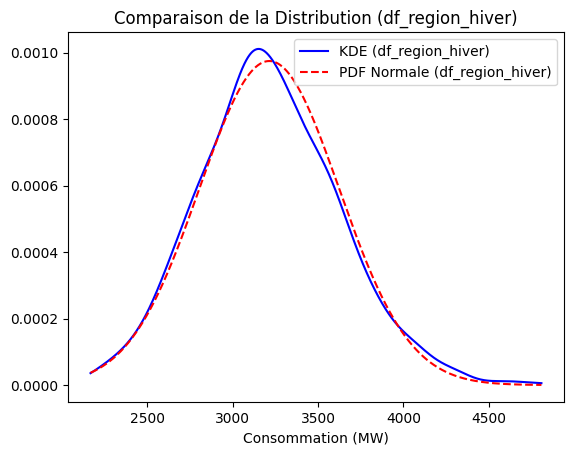

In [16]:
# Calculer le KDE (Kernel Density Estimate) de df_region et df_region_hiver
kde_1 = gaussian_kde(df_region['consumption'])
kde_2 = gaussian_kde(df_region_hiver['consumption'])

# Générer les valeurs x pour le tracé
x1 = np.linspace(min(df_region['consumption']), max(df_region['consumption']), 1000)
x2 = np.linspace(min(df_region_hiver['consumption']), max(df_region_hiver['consumption']), 1000)

# Créer la première figure
plt.figure(1)

# Tracer le KDE de df_region
plt.plot(x1, kde_1(x1), label="KDE (df_region)", color='blue')

# Tracer la PDF (Probability Density Function) d'une distribution normale avec la même moyenne et écart-type que df_region
pdf_normale_1 = norm.pdf(x1, loc=moyenne, scale=np.std(df_region['consumption']))
plt.plot(x1, pdf_normale_1, label="PDF Normale (df_region)", linestyle='dashed', color='red')

# Ajouter des étiquettes, une légende, etc. pour la première figure
plt.xlabel("Consommation (MW)")
plt.legend()
plt.title("Comparaison de la Distribution (df_region)")

# Créer la deuxième figure
plt.figure(2)

# Tracer le KDE de df_region_hiver
plt.plot(x2, kde_2(x2), label="KDE (df_region_hiver)", color='blue')

# Tracer la PDF d'une distribution normale avec la même moyenne et écart-type que df_region_hiver
pdf_normale_2 = norm.pdf(x2, loc=np.mean(df_region_hiver['consumption']), scale=np.std(df_region_hiver['consumption']))
plt.plot(x2, pdf_normale_2, label="PDF Normale (df_region_hiver)", linestyle='dashed', color='red')

# Ajouter des étiquettes, une légende, etc. pour la deuxième figure
plt.xlabel("Consommation (MW)")
plt.legend()
plt.title("Comparaison de la Distribution (df_region_hiver)")

# Afficher les deux figures
plt.show()

Dans le cas des jours d'hiver (du 22/12 au 21/03), il est plus approprié d'utiliser une hypothèse gaussienne. En regardant les graphiques ci-dessus, on peut voir que pour les données réelles des jours d'hiver en Bretagne ("df_winter"), la manière dont elles sont réparties est très similaire à ce à quoi l'on s'attendrait avec une distribution normale, ce qui suggère que ces données suivent cette loi gaussienne. En revanche, pour les données de la région de Bretagne dans leur ensemble ("df_region"), la façon dont elles sont réparties est significativement différente de ce à quoi l'on s'attendrait avec une distribution normale, ce qui indique que l'hypothèse gaussienne ne convient pas à ces données.

## B. Goodness of fit

On souhaite confirmer et quantifier l'observation de la partie A.

Nous proposons la mesure de dissimilarité suivante, qui se base sur deux fonctionnes de répartitions $f$ et $g$:
$$
d(f, g) = \frac 1 2 \int |f(x) - g(x)| \mathrm dx.
$$

1. Montrez que $d(f,g) \in [0,1]$, avec $d(f,g)=0$ si et seulement si $f=g$ presque partout (pour la mesure de Lebesgue) et $d(f,g)=1$ si et seulement si $f$ et $g$ possèdent des supports disjoints.

Pour montrer que $d(f, g) \in [0,1]$, et que $d(f, g) = 0$ si et seulement si $f = g$ presque partout pour la mesure de Lebesgue, nous allons prouver ces deux propriétés séparément.

1. Montrons que $d(f, g) \geq 0$.

   Pour tout $x$, $|f(x) - g(x)|$ est toujours positif ou nul, car c'est la valeur absolue. Par conséquent, l'intégrale de $|f(x) - g(x)|$ est également positive ou nulle. En multipliant par $1/2$, nous obtenons que $d(f, g) \geq 0$.

2. Montrons que $d(f, g) \leq 1$.

   Soit $h(x) = |f(x) - g(x)|$. Par définition, $0 \leq h(x) \leq 1$, car la valeur absolue est toujours positive ou nulle, et la division par 2 n'affecte pas cette inégalité. Par conséquent, l'intégrale de $h(x)$ est bornée par l'intervalle $[0, 1]$. En multipliant par $1/2$, nous obtenons que $d(f, g) \leq 1$.

De 1. et 2. on conclut que $d(f, g) \in [0,1]$

3. Montrons que $d(f, g) = 0$ si et seulement si $f = g$ presque partout.

   Si $d(f, g) = 0$, alors $\int |f(x) - g(x)| \mathrm{d}x = 0$, ce qui signifie que $|f(x) - g(x)| = 0$ presque partout. Cela implique que $f(x) - g(x) = 0$ presque partout, ce qui équivaut à $f = g$ presque partout.

   D'autre part, si $f = g$ presque partout, alors $|f(x) - g(x)| = 0$ presque partout. Par conséquent, l'intégrale de $|f(x) - g(x)|$ est nulle, et en multipliant par $1/2$, nous obtenons $d(f, g) = 0$.


Ainsi, nous avons montré que $d(f, g) \in [0,1]$ et que $d(f, g) = 0$ si et seulement si $f = g$ presque partout pour la mesure de Lebesgue.

Maintenant, pour montrer que \(d(f, g) = 1\) si et seulement si \(f\) et \(g\) possèdent des supports disjoints, nous allons diviser cette preuve en deux parties : 

On suppose que $d(f,g) = 1$.

Alors on a :
$$
\int_\R|f-g|=\int_{\mathrm{Supp}(f)\setminus\mathrm{Supp}(g)}f+\int_{\mathrm{Supp}(g)\setminus\mathrm{Supp}(f)}g+\int_{\R\setminus(\mathrm{Supp}(f)\cup\mathrm{Supp}(g))}0+ \int_{\mathrm{Supp}(f)\cap\mathrm{Supp}(g))}|f-g|
$$

Pareillement pour g, on a alors :

$$
\int_{Supp(f)\cap Supp(g)}|f-g|+\int_{Supp(f)\setminus Supp(g)}f+\int_{Supp(g)\setminus Supp(f)}g=\int_{Supp(f)}f+\int_{Supp(g)}g
$$

Donc :

$$
\int_{Supp(f)\cap Supp(g)}|f-g|=\int_{Supp(g)}f+\int_{Supp(f)}g
$$

Et on sait que :

$$
\int_{Supp(f)\cap Supp(g)}|f-g|≤\int_{Supp(f)\cap Supp(g)}f+ \int_{Supp(f)\cap Supp(g)}g
$$

Donc :

$$
\int_{Supp(g)}f-\int_{Supp(f)\cap Supp(g)}f= -\int_{Supp(f)}g+\int_{Supp(f)\cap Supp(g)}g
$$

Mais si par absurde : $Supp(f)\cap Supp(g) \neq \emptyset$

$$
-\int_{Supp(f)}g+\int_{Supp(f)\cap Supp(g)}g>0
$$

De même, on a :

$$
\int_{Supp(g)}f-\int_{Supp(f)\cap Supp(g)}f>0
$$

Ce qui est contradictoire car les deux quantités sont égales. Donc c'est absurde.

En résumé, $d(f, g) = 1$ si et seulement si $f$ et $g$ possèdent des supports disjoints.

2. Pour la région Bretagne, calculez la dissimilarité entre le *kde* des données réelles et de la densité du modèle gaussien.

In [17]:
# Calcule la dissimilarité entre le KDE et la distribution normale pour la région de Bretagne
dissimilarite = 0.5 * np.trapz(np.abs(kde_1(x1) - norm.pdf(x1, loc=moyenne, scale=np.sqrt(variance))), x1)

# Affiche la dissimilarité calculée
print(dissimilarite)

0.16178456600651053


3. Répétez la même procedure pour la région Bretagne en hiver et verifiez votre conclusion de la partie A.

In [18]:
# Calcule la dissimilarité entre le KDE et la distribution normale pour la région de Bretagne en hiver
dissimilarite_hiver = 0.5 * np.trapz(np.abs(kde_2(x2) - norm.pdf(x2, loc=df_region_hiver["consumption"].mean(), scale=np.sqrt(df_region_hiver["consumption"].var()))), x2)

# Affiche la dissimilarité calculée
print(dissimilarite_hiver)

0.029456309421248168


La dissimilarité entre KDE et modèle gaussien pour la région Bretagne est largement suppérieure à cette dernière en hiver, ce qui confirme notre conclusion de la partie A. C'est-à-dire que l'approximation gaussiène est plus appropriée en hiver.

4. Répétez la même procedure pour toutes régions. Présentez le résultat dans un seul dataframe.

In [19]:
# Crée un DataFrame vide pour stocker les résultats de dissimilarité
df_dissimilarite = pd.DataFrame(columns=['Region', 'Dissimilarite', 'Dissimilarite_hiver'])

# Initialise une liste vide pour stocker les résultats
resultats = []

# Boucle sur chaque région dans la liste des régions
for region in regions:
    # Sélectionne les données de la région actuelle à partir du DataFrame principal
    data = df[df.region == region].copy()
    
    # Convertit la colonne "date" en format datetime pour travailler avec les dates
    data['date'] = pd.to_datetime(data['date'])

    # Sélectionne les lignes du DataFrame où la date est dans la période hivernale (du 22/12 au 21/03)
    data_hiver = data[
        ((data['date'].dt.month == 12) & (data['date'].dt.day >= 22)) |
        ((data['date'].dt.month == 1)) | ((data['date'].dt.month == 2)) |
        ((data['date'].dt.month == 3) & (data['date'].dt.day <= 21))
    ]

    # Calcule le KDE (Kernel Density Estimate) pour les données de la région
    kde = gaussian_kde(data['consumption'])
    kde_hiver = gaussian_kde(data_hiver['consumption'])

    # Génère les valeurs x pour le tracé
    x = np.linspace(min(data['consumption']), max(data['consumption']), 1000)
    x_hiver = np.linspace(min(data_hiver['consumption']), max(data_hiver['consumption']), 1000)

    # Calcule la dissimilarité en effectuant une intégration numérique de la différence entre le KDE et la distribution normale
    dissimilarite = 0.5 * np.trapz(np.abs(kde(x) - norm.pdf(x, loc=data["consumption"].mean(), scale=np.sqrt(data["consumption"].var()))), x)
    dissimilarite_hiver = 0.5 * np.trapz(np.abs(kde_hiver(x_hiver) - norm.pdf(x_hiver, loc=data_hiver["consumption"].mean(), scale=np.sqrt(data_hiver["consumption"].var()))), x_hiver)

    # Ajoute les résultats à la liste
    resultats.append({'Region': region, 'Dissimilarite': dissimilarite, 'Dissimilarite_hiver': dissimilarite_hiver})

# Crée un DataFrame à partir des résultats
df_dissimilarite = pd.DataFrame(resultats)

# Affiche le DataFrame contenant les résultats
df_dissimilarite

,Region,Dissimilarite,Dissimilarite_hiver
0,Auvergne-Rhône-Alpes,0.152976,0.037066
1,Bourgogne-Franche-Comté,0.119683,0.036725
2,Bretagne,0.161785,0.029456
3,Centre-Val de Loire,0.172765,0.042221
4,Grand Est,0.107345,0.037367
5,Hauts-de-France,0.119946,0.026283
6,Normandie,0.172445,0.041309
7,Nouvelle-Aquitaine,0.195011,0.052095
8,Occitanie,0.198910,0.059806
9,Pays de la Loire,0.152959,0.036723


5. Quelle région a le meilleur *fit* avel le modèle gaussien en hiver ?

In [20]:
# Trier le DataFrame par ordre croissant de dissimilarite en hiver
resultats_tries = df_dissimilarite.sort_values(by='Dissimilarite_hiver')

# Extraire la région avec le meilleur ajustement (première ligne)
region_meilleur_fit = resultats_tries.iloc[0]['Region']

# Afficher la région avec le meilleur ajustement
print("La région avec le meilleur fit au modèle gaussien en hiver est :", region_meilleur_fit)

La région avec le meilleur fit au modèle gaussien en hiver est : Hauts-de-France


6. Pour ces région et saison, tracez le *kde* des données réelles et le *kde* des données générées sur le même graphique.

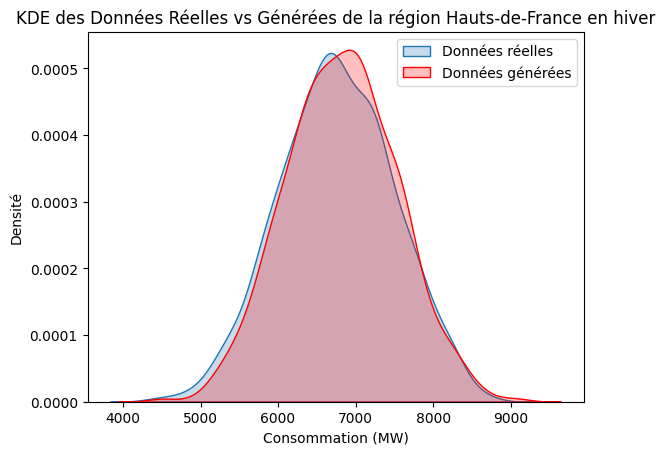

In [21]:
# Sélectionne les données de la région avec le meilleur fit avec le modèle gaussien à partir du DataFrame principal
df_region_meilleur_fit = df[df.region == region_meilleur_fit]

# Sélectionne les lignes du DataFrame où la date est dans la période hivernale (du 22/12 au 21/03)
df_region_meilleur_fit_hiver = df_region_meilleur_fit[
    ((df_region_meilleur_fit['date'].dt.month == 12) & (df_region_meilleur_fit['date'].dt.day >= 22)) |
    ((df_region_meilleur_fit['date'].dt.month == 1)) | ((df_region_meilleur_fit['date'].dt.month == 2)) |
    ((df_region_meilleur_fit['date'].dt.month == 3) & (df_region_meilleur_fit['date'].dt.day <= 21))
]

# Génération de nouvelles données en utilisant une distribution normale avec la moyenne et la variance des données existantes
nouvelles_donnees_region_meilleur_fit_hiver = norm.rvs(
    loc=df_region_meilleur_fit_hiver["consumption"].mean(), 
    scale=np.sqrt(df_region_meilleur_fit_hiver["consumption"].var()), 
    size=len(df_region_meilleur_fit_hiver)
)

# Trace l'estimateur à noyau de densité (KDE) pour les données réelles en bleu avec un remplissage
sns.kdeplot(data=df_region_meilleur_fit_hiver, label="Données réelles", color='blue', fill=True)

# Trace l'estimateur à noyau de densité (KDE) pour les données générées en rouge avec un remplissage
sns.kdeplot(data=nouvelles_donnees_region_meilleur_fit_hiver, label="Données générées", color='red', fill=True)

# Ajoute une étiquette à l'axe des x et des y
plt.xlabel("Consommation (MW)")
plt.ylabel("Densité")

# Ajoute une légende basée sur les labels fournis lors du traçage
plt.legend()

# Définit le titre du graphique
plt.title("KDE des Données Réelles vs Générées de la région " + region_meilleur_fit + " en hiver")

# Affiche le graphique
plt.show()

## C. Statistique bayésienne

On souhaite inclure la connaissance a priori sur l'estimation, en utilisant la statistique bayésienne.

Considérez la région Bretagne en hiver. On se focalise sur la moyenne $\mu$, en supposant que l'écart-type est connu et egal à $\sigma=400$ MW. Supposons la loi a priori sur $\mu$ avec moyenne $\mu_0=3500$ MW et l'écart-type $\sigma_0=500$ MW.

1. Donnez la loi a posteriori pour $\mu$, en utilisant les paramètres $\sigma$, $\mu_0$, $\sigma_0$ et $n$ observations $x_1,\ldots,x_n$.

Comme on a vu dans le premier exercice du quatrième TD, la loi a posteriori pour $\mu$ en utilisant les paramètres $\sigma$, $\mu_0$, $\sigma_0$, et $n$ observations $x_1, x_2, \ldots, x_n$ est donnée par la distribution de probabilité conditionnelle de $\mu$ étant donné les données et la loi a priori. En utilisant la loi normale, la formule de la distribution a posteriori est donnée par la loi normale de la distribution de probabilité a priori multipliée par la vraisemblance des données. Cette distribution est également connue sous le nom de loi de distribution a posteriori de la loi normale.

La distribution a priori sur $\mu$ est donnée par une loi normale avec moyenne $\mu_0$ et écart-type $\sigma_0$, c'est-à-dire :

$$
\mu \sim \mathcal{N}(\mu_0, \sigma_0^2)
$$

La distribution de vraisemblance des données est également une loi normale avec moyenne $\mu$ et écart-type $\sigma$ :

$$
x_i \sim \mathcal{N}(\mu, \sigma^2)
$$

Maintenant, pour obtenir la loi a posteriori, nous utilisons le théorème de Bayes, qui dit que la distribution a posteriori est proportionnelle au produit de la distribution a priori et de la vraisemblance :

$$
\text{Posterior} \propto \text{Likelihood} \times \text{Prior}
$$

En utilisant les distributions normales, nous pouvons écrire la loi a posteriori pour $\mu$ comme suit :

$$
\text{Posterior}(\mu | x_1, x_2, \ldots, x_n) \propto \mathcal{N}(\mu | \mu_0, \sigma_0^2) \times \prod_{i=1}^{n} \mathcal{N}(x_i | \mu, \sigma^2)
$$

Après, nous multiplions les densités de probabilité gaussiennes. La densité de probabilité a posteriori sera également une loi normale, dont les paramètres peuvent être calculés en utilisant les règles de multiplication de lois normales.

Les paramètres de la loi a posteriori sont les suivants :
- Moyenne $\mu_{\text{posterior}}$
- Écart-type $\sigma_{\text{posterior}}$

La formule pour calculer ces paramètres est la suivante :

$$
\sigma_{\text{posterior}}^2 = \left(\frac{1}{\sigma_0^2} + \frac{n}{\sigma^2}\right)^{-1}
$$

$$
\mu_{\text{posterior}} = \sigma_{\text{posterior}}^2 \left(\frac{\mu_0}{\sigma_0^2} + \frac{\sum_{i=1}^n x_i}{\sigma^2}\right)
$$

Donc, la loi a posteriori pour $\mu$ est une distribution normale avec les paramètres $\mu_{\text{posterior}}$ et $\sigma_{\text{posterior}}$ calculés comme ci-dessus.

2. Donnez les paramètres de la loi a posteriori obtenue pour chaque année de 2013 au 2023, considérée independament, dans un seul dataframe.

In [22]:
# Paramètres constants
sigma = 400  # Écart-type connu
mu_0 = 3500  # Moyenne a priori
sigma_0 = 500  # Écart-type a priori

region = "Bretagne"

# Création d'une liste pour stocker les paramètres a posteriori
params_post = []

# Itérer sur les années de 2013 à 2023
for annee in range(2013, 2024):
    # Filtrer les données de l'année d'hiver
    data_annee = df_region_hiver[
        (df_region_hiver['date'].dt.year == annee)
    ]

    # Nombre d'observations
    n = len(data_annee)
    
    # Calcul des paramètres de la loi a posteriori
    sum_x = data_annee['consumption'].sum()

    sigma_post = 1 / ((1 / (sigma_0**2)) + (n / (sigma**2)))
    mu_post = sigma_post * ((mu_0 / (sigma_0**2)) + ((sum_x / (sigma**2))))
    
    # Ajouter les paramètres a posteriori à la liste
    params_post.append({"Year": annee, "Mu_post": mu_post, "Sigma_post²": sigma_post})

# Créer un DataFrame à partir de la liste
df_posterior_params = pd.DataFrame(params_post)

# Afficher le DataFrame des paramètres a posteriori
df_posterior_params

,Year,Mu_post,Sigma_post²
0,2013,3343.413504,1765.225066
1,2014,3118.424537,1765.225066
2,2015,3167.398500,1765.225066
3,2016,3207.507639,1745.962462
4,2017,3251.224625,1765.225066
5,2018,3315.081642,1765.225066
6,2019,3195.200794,1765.225066
7,2020,3145.504147,1745.962462
8,2021,3341.946161,1765.225066
9,2022,3165.081642,1765.225066


3. Tracez la densité de la loi a posteriori en 2023 et le *kde* des données réelles en 2023, sur le même graphique.

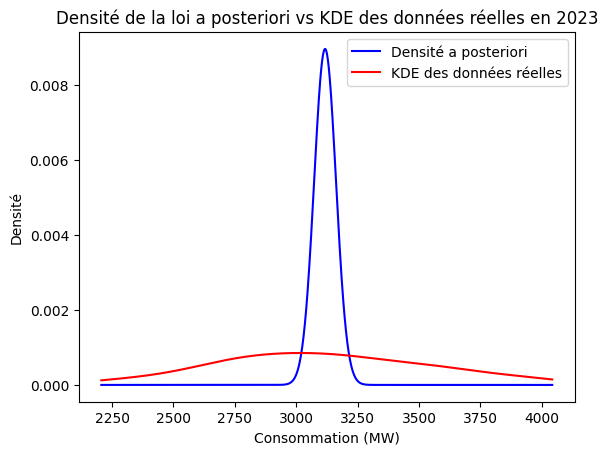

In [23]:
# Filtrer les données de l'année d'hiver en 2023
data_2023 = df_region_hiver[df_region_hiver['date'].dt.year == 2023]

# Nombre d'observations
n = len(data_2023)

# Calcul des paramètres de la loi a posteriori
sum_x = data_2023['consumption'].sum()
sigma_post = np.sqrt(1 / (1 / (sigma_0**2) + n / (sigma**2)))
mu_post = sigma_post**2 * (mu_0 / (sigma_0**2) + (sum_x / (sigma**2)))

# Calculer le KDE des données réelles en 2023
kde_reel_2023 = gaussian_kde(data_2023['consumption'])
x_kde_reel_2023 = np.linspace(min(data_2023['consumption']), max(data_2023['consumption']), 1000)

# Générer des valeurs pour la densité de la loi a posteriori
pdf_post = norm.pdf(x_kde_reel_2023, loc=mu_post, scale=sigma_post)

# Tracez la densité de la loi a posteriori en 2023 en bleu
plt.plot(x_kde_reel_2023, pdf_post, label="Densité a posteriori", color='blue')

# Tracez le KDE des données réelles en 2023 en rouge
plt.plot(x_kde_reel_2023, kde_reel_2023(x_kde_reel_2023), label="KDE des données réelles", color='red')

# Ajouter des étiquettes, une légende, etc.
plt.xlabel("Consommation (MW)")
plt.ylabel("Densité")
plt.legend()
plt.title("Densité de la loi a posteriori vs KDE des données réelles en 2023")

# Afficher le graphique
plt.show()

4. Discutez les résultats, en les comparant avec ceux obtenus dans la partie A.

Comme on l'a vu dans la partie A, l'hypothèse gaussienne est plus appropriée en hiver. Les valeurs moyennes de la densité a posteriori et des données réelles sont proches, ce qui signifie que le modèle a bien capturé la tendance centrale des données. Cela dit, l'écart-type de la densité a posteriori est plus petit que celui des données réelles, cela indique que le modèle est plus restrictif en termes de dispersion. Il estime que les données sont moins variables que ce que nous avons observé.

## D. Test d'hypothèse

Considérez la région Bretagne. Alors que l'écart-type en hiver est egal à 400MW, vous souhaitez tester l'hypothèse que c'était 500MW en 2023. La moyenne est supposée connue et egal à 3200MW.

1. Proposez la statisque du test pour un niveau $\alpha$.

L'hypothèse qu'on souhaite tester est H0 : $\sigma_0=500$ MW (hypothèse nulle) contre l'hypothèse alternative H1 : $\sigma_1=400$ MW.

Pour cela, on utilise le test du rapport de vraisemblance.

$$
R(X) = \frac{L(X;\sigma_1)}{L(X;\sigma_0)}
$$

$$
L(\mathbf{X} |\sigma) = \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi}\sigma} exp{-\frac{(x_i - \mu)^2}{2\sigma^2}}
$$

$$
R(\mathbf{X} |\sigma_0, \sigma_1) = \prod_{i=1}^{n} \frac{f_0(x_i | \mu, \sigma_0)}{f_1(x_i | \mu, \sigma_1)} = \prod_{i=1}^{n} \frac{\frac{1}{\sqrt{2\pi}\sigma_0}e^{-\frac{(x_i - \mu)^2}{2\sigma_0^2}}}{\frac{1}{\sqrt{2\pi}\sigma_1}e^{-\frac{(x_i - \mu)^2}{2\sigma_1^2}}}
$$

En simplifiant, cela donnerait :

$$
R(\mathbf{X} |\sigma_0, \sigma_1) = \left(\frac{\sigma_1}{\sigma_0}\right)^n \exp{\sum_{i=1}^{n} \left(\frac{(x_i - \mu)^2}{2\sigma_0^2} - \frac{(x_i - \mu)^2}{2\sigma_1^2}\right)}
$$

Pour avoir $R(X) > c$ il faut avoir $\sum_{i=1}^n(x_i - \mu)^2 > q$

$$\mathbb P_{\sigma_0}\left(∑^n_{i=1}(X_i-\mu)^2 > q\right)= α$$

Alors, on trouve $q = \sigma_0^2 \chi^{2\ (n)} _{1 - \alpha}$


2. Donnez le résultat de ce test pour $\alpha=1\%$.

In [24]:
# Paramètres des hypothèses nulle (écart-type de 500 MW) et alternative (écart-type de 400 MW)
sigma_0 = 500  # Écart-type sous l'hypothèse nulle
sigma_1 = 400  # Écart-type sous l'hypothèse alternative
mu_connue = 3200  # Moyenne connue de la consommation en 2023

# Taille de l'échantillon
n = len(data_2023)  # Le nombre d'observations dans l'échantillon de données

# Calcul de la valeur critique à un niveau alpha (1%)
alpha = 0.01  # Niveau de confiance spécifié pour le test (1%)

# Calcul de la valeur critique q en utilisant la distribution du Chi-2
q = sigma_0**2 * chi2.ppf(1 - alpha, n)
# Le test utilise la distribution du Chi-2 pour obtenir la valeur critique correspondant au niveau de confiance

# Calcul de la statistique de test R
R = sum((data_2023["consumption"] - mu_connue)**2)
# Calcule la statistique de test R en soustrayant la moyenne connue de chaque observation, en élevant au carré et en sommant

# Comparaison avec la valeur critique
if R > q:
    # Si la statistique de test R est supérieure à la valeur critique q, alors on rejette l'hypothèse nulle
    print("Rejeter l'hypothèse nulle (donc l'écart-type est de 400 MW en 2023)")
else:
    # Sinon, on ne rejette pas l'hypothèse nulle
    print("Ne pas rejeter l'hypothèse nulle (donc l'écart-type est de 500 MW en 2023)")

Ne pas rejeter l'hypothèse nulle (donc l'écart-type est de 500 MW en 2023)


## E. Test d'indépendence

Considérez la consomation d'electicité en Bretagne et en Provence-Alpes-Côte d'Azur en hiver.

1. Visualisez la loi jointe de la consomation dans ces 2 régions en utilisant la librarie **seaborn**.

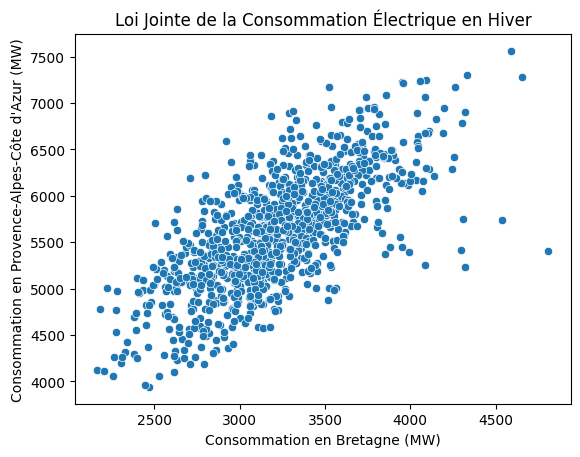

In [25]:
# Sélection des données pour la région "Provence-Alpes-Côte d'Azur" et conversion de la colonne 'date' en datetime
df_paca = df[df.region == "Provence-Alpes-Côte d'Azur"].copy()
df_paca['date'] = pd.to_datetime(df_paca['date'])

# Sélection des données pour la période hivernale (du 22/12 au 21/03)
df_paca_hiver = df_paca[
    ((df_paca['date'].dt.month == 12) & (df_paca['date'].dt.day >= 22)) |
    ((df_paca['date'].dt.month == 1)) | ((df_paca['date'].dt.month == 2)) |
    ((df_paca['date'].dt.month == 3) & (df_paca['date'].dt.day <= 21))
]

# Création d'un DataFrame 'data' avec les consommations d'électricité en Bretagne et en PACA pendant l'hiver
data = pd.DataFrame({
    'Consommation Bretagne': df_region_hiver['consumption'].values,
    'Consommation PACA': df_paca_hiver['consumption'].values
})

# Création d'un nuage de points (scatter plot) avec régression linéaire en utilisant Seaborn
sns.scatterplot(data=data, x='Consommation Bretagne', y='Consommation PACA')

# Personnalisation des étiquettes des axes
plt.xlabel('Consommation en Bretagne (MW)')
plt.ylabel('Consommation en Provence-Alpes-Côte d\'Azur (MW)')
plt.title('Loi Jointe de la Consommation Électrique en Hiver')

# Affichage du graphique
plt.show()


In [26]:
# Affiche le coefficient de correlation des données
print(data.corr())

                       Consommation Bretagne  Consommation PACA
Consommation Bretagne                1.00000            0.71678
Consommation PACA                    0.71678            1.00000


2. Est-ce que vous pensez que la consomation dans ces 2 régions est indépendante ?

Non, car :

a. Le nuage de points est très serré autour de la ligne centrale (la droite y = x), cela suggère une forte corrélation positive entre les deux régions. Cela signifie que lorsque la consommation d'électricité augmente dans une région, elle a tendance à augmenter également dans l'autre région, et vice versa.

b. Un coefficient de corrélation de 0,71678 indique une corrélation positive significative entre les deux régions. La corrélation positive suggère une relation de dépendance, ce qui signifie que les deux régions ont tendance à suivre des schémas similaires en ce qui concerne la consommation d'électricité en hiver.

3. Proposez le test du Chi-2 pour l'indépendance de la consomation dans ces deux régions pour un niveau $\alpha$. 

On considère les variables aléatoires X et Y, qui représentent respectivement la consommation en hiver en Bretagne et en Provence. Notre objectif est de tester l'hypothèse nulle, notée $H_0$, qui stipule que les variables X et Y sont indépendantes.

Afin de rendre ces variables catégorielles, nous les subdivisons en 3 catégories en fonction de la valeur de la consommation : faible, moyenne et élevée. Cela signifie que les variables X et Y prennent chacune 3 valeurs distinctes. Pour décrire cette situation, utilisons $N_{ij}$, où $i$ et $j$ sont compris entre 1 et 3, pour représenter les effectifs observés des données où X prend la valeur $i$ et Y prend la valeur $j$.

Sous l'hypothèse d'indépendance, nous pouvons estimer la valeur attendue $M_{ij}$ comme suit :
$$
M_{ij} = \frac{O_{i+} \times O_{+j}}{N}
$$
où
$N_{i+}$ représente la somme des données pour lesquelles X est égal à $i$, et
$N_{+j}$ représente la somme des données pour lesquelles Y est égal à $j$.
N est le nombre total de données.

Pour évaluer à quel point les valeurs observées, $N_{ij}$ (ou valeurs empiriques), diffèrent des valeurs attendues dans le cas de l'indépendance, $E_{ij}$ (ou valeurs théoriques), nous utilisons la formule suivante :
$$
T = \sum_{i,j}^3 \frac{(N_{ij} - M_{ij})^2}{E_{ij}}
$$

Il est démontré que la statistique T suit asymptotiquement une distribution du Chi-2 avec $(3 - 1) \times (3 - 1) = 4$ degrés de liberté. En d'autres termes, nous rejetons l'hypothèse nulle $H_0$ lorsque la réalisation de T est significativement éloignée de l'attendu. Plus précisément, nous rejetons $H_0$ si :
$$
T > \chi^{2\ (4)}_{1 - \alpha}
$$
où $\alpha$ est le niveau de confiance souhaité pour le test.

4. Donnez le résultat de ce test pour $\alpha=1\%$.

In [27]:
# Creation de Dataframe
df_bret_paca = pd.DataFrame(data)

# Définissez le nombre de catégories (dans ce cas, Faible, Moyen et Grand)
nb_categories = 3

# Utilisez la fonction qcut de pandas pour calculer les seuils intelligemment
df_bret_paca['Categorie Bretagne'] = pd.qcut(df_bret_paca['Consommation Bretagne'], q=nb_categories, labels=['Faible', 'Moyen', 'Grand'])
df_bret_paca['Categorie PACA'] = pd.qcut(df_bret_paca['Consommation PACA'], q=nb_categories, labels=['Faible', 'Moyen', 'Grand'])

# Créez un tableau de contingence (tableau croisé) entre les deux catégories
contingency_table = pd.crosstab(df_bret_paca['Categorie Bretagne'], df_bret_paca['Categorie PACA'])

# Calculez le test du Chi-2 manuellement en tenant compte des catégories
observed_values = contingency_table.values

# Calculez les fréquences attendues pour chaque cellule du tableau
row_totals = contingency_table.sum(axis=1)
col_totals = contingency_table.sum(axis=0)
total = df_bret_paca.shape[0]

expected = np.outer(row_totals, col_totals) / total

# Calculez la statistique du Chi-2
chi2_value = np.sum((observed_values - expected)**2 / expected)

# Degré de liberté
degrees_of_freedom = (contingency_table.shape[0] - 1) * (contingency_table.shape[1] - 1)

# Niveau de signification (alpha)
alpha = 0.01

# Comparaison avec la valeur critique du Chi-2
critical_value = chi2.ppf(1 - alpha, degrees_of_freedom)

if chi2_value > critical_value:
    print("On rejète l'hypothèse H0. Il y a une relation significative entre la consommation en Bretagne et en PACA.")
else:
    print("On ne rejète pas l'hypothèse H0. Il n'y a pas de relation significative entre la consommation en Bretagne et en PACA.")

# Affichage des résultats
print("Test du Chi-2:", chi2_value)
print("Valeur critique du Chi-2:", critical_value)
print("Degré de liberté:", degrees_of_freedom)


On rejète l'hypothèse H0. Il y a une relation significative entre la consommation en Bretagne et en PACA.
Test du Chi-2: 412.19087970380076
Valeur critique du Chi-2: 13.276704135987622
Degré de liberté: 4


## F. Intervalle de confiance

Considérez la région Bretagne en hiver.

1. Donnez l'intervalle de confiance pour un niveau $\alpha=95\%$ pour la moyenne consomation d'electricité.

In [28]:
from scipy.stats import t

# Taille de l'échantillon
n = len(df_region_hiver)

# Niveau de confiance
alpha = 0.05  # Pour un niveau de confiance de 95%

# Calcul de l'intervalle de confiance
t_critical = t.ppf(1 - alpha/2, df=n-1)  # Valeur critique de t pour alpha/2 et n-1 degrés de liberté
margin_of_error = t_critical * (np.sqrt(df_region_hiver["consumption"].var()) / np.sqrt(n))  # Marge d'erreur

confidence_interval = (df_region_hiver["consumption"].mean() - margin_of_error, df_region_hiver["consumption"].mean() + margin_of_error)

print("Intervalle de confiance à 95% pour la moyenne de la consommation en Bretagne en hiver :")
print(confidence_interval)

Intervalle de confiance à 95% pour la moyenne de la consommation en Bretagne en hiver :
(3188.5358856463263, 3239.820529832289)


2. Donnez le résultat du test de Student pour un niveau $5\%$ pour l'hypothèse null que la moyenne consomation en 2023 est egal à 3100MW.

In [29]:
# Valeur de la moyenne sous l'hypothèse nulle
mean_null = 3100  # Moyenne sous l'hypothèse nulle

# Niveau de signification (alpha)
alpha = 0.05  # Pour un niveau de signification de 5%

n = len(data_2023)

# Calcul du t-statistique
t_statistic = (data_2023["consumption"].mean() - mean_null) / (np.sqrt(data_2023["consumption"].var()) / np.sqrt(n))

# Calcul de la p-valeur
p_value = 2 * (1 - t.cdf(abs(t_statistic), df=n-1))

# Affichage des résultats
print("Résultat du test de Student :")
print("T-statistique :", t_statistic)
print("P-valeur :", p_value)

# Test de l'hypothèse nulle
if p_value < alpha:
    print("Conclusion : L'hypothèse nulle est rejetée. La moyenne de la consommation en 2023 n'est pas égale à 3100 MW.")
else:
    print("Conclusion : L'hypothèse nulle n'est pas rejetée. La moyenne de la consommation en 2023 est égale à 3100 MW.")

Résultat du test de Student :
T-statistique : 0.30764815980243937
P-valeur : 0.7591596860406198
Conclusion : L'hypothèse nulle n'est pas rejetée. La moyenne de la consommation en 2023 est égale à 3100 MW.
